In [1]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd
import math

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

## Modelos a partir de la curva de reacción

* Modelo de primer orden
* Modelo de segundo orden
* Sistemas con Tiempo muerto

Es un método de identificación que se basa en características que presenta la curva de respuesta del sistema frente a una entrada de escalón o cualquier entrada. Estas características pueden ser: Valor final, tiempo de estabilización, sobrepaso máximo, etc.

## Sistemas de primer orden

Un sistema de primer orden es aquel que en su modelo analítico en tiempo continuo, involucra por lo menos una primera derivada de la variable de interés. Los parámetros a tener en cuenta para la identificación son: Constante de tiempo($\tau$), ganancia (K).

$$G(s)=\frac{K}{\tau s + 1}$$

$\tau$: Hace referencia a la velocidad de respuesta del sistema, tanto más grande la constante de tiempo más lento responde el sistema.

## Ejemplo 1 - orden 1

Por ejemplo, si modelamos o simulamos una adquisición de datos de un sistema de primer orden así:

1. Primero se genera un valor aleatorio de ganancia $K$ y de constante de tiempo $\tau$.
2. Luego se declara la función de transferencia usando estos valores.
3. Se aplica un escalón a dicho sistema y se almacena la respuesta temporal.
4. Finalmente la respuesta del punto 3, se contamina con un ruido blanco valor medio 0 (esto con el fin de simular que los datos se midieron).

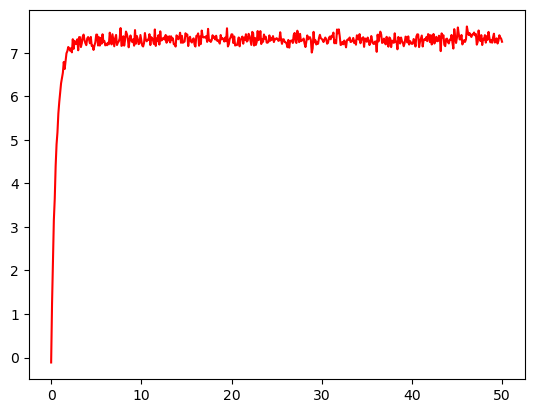

In [15]:
## Respuesta típica de un sistema de primer orden con ruido

## Simulando el experimento de medición y captura de datos

K = np.random.rand()*10
tao = np.random.rand()*5
tf = 50
dt = 0.1
t = np.linspace(0,tf,int(tf/dt)+1)

g = control.tf(K,[tao,1])
_,y = control.step_response(g,t)
N = len(t)

## Simulacion de ruido para contaminar la señal de salida capturada "y"
r = 0.1
e = np.random.normal(0,r,size=N)
yn = y+e
plt.plot(t,yn,color = 'red')
K, tao

## Experimento de identificación

**Paso 1:** Identificar el 63.2% del valor final para poder determinar el $\tau$ del sistema. Y el tiempo de establecimiento ($t_s = 4\tau$).

Este paso es visual, en el ejemplo se usa la variable Ke, para definir a ojo el valor final y esto es susceptible a que si el ruido es muy grande, se deba aproximar mucho el valor de Ke.

In [16]:
## Determinando tao (sin conocer al función original)
tao = 0;

## Visualmente definimos el 63.2% del valor final
Ke = 7
V6 = 0.632*Ke;

for k in range(N):
    if(yn[k]>=V6):
        tao = t[k]
        break
## Calculando el tiempo de establecimiento
ts = 4*tao
ts, tao

**Paso 2:** Determinar una aproximación mas real del valor final, para este caso es calcular el valor promedio de todas las "yn" para un tiempo mayor al de establecimiento.

In [17]:
## Calculando el valor final (Sin conocer sistema original)
Kf = 0
i1 = 0;
i2 = 0;
for j in range(N):
    if(t[j]>ts):
        Kf = Kf+yn[j]
        i2 = i2+1

Kf = Kf/i2
print(Kf)                

7.298201421575019


**Paso 3:** Armar la función de transferencia estimada

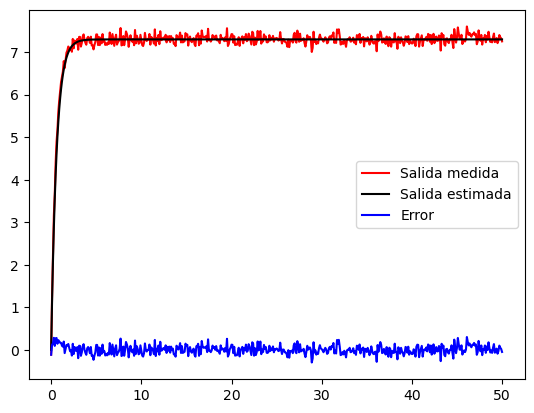

In [18]:
## Armando la función de transferencia aproximada:
ge = control.tf([Kf],[tao,1])
_,ye = control.step_response(ge,t)
e = yn - ye
plt.plot(t,yn,color = 'red')
plt.plot(t,ye,color = 'black')
plt.plot(t,e,color = 'blue')
plt.legend(['Salida medida','Salida estimada','Error'])


In [10]:
ge

TransferFunction(array([5.8747757]), array([5.7, 1. ]))